<h1><center> LOAN DEFAULT PREDICTION </h1>

## Features
### ID = Customer ID of Applicant
### year = Year of Application
### loan limit = maximum avaliable amount of the loan allowed to be taken
### Gender = sex type
### approv_in_adv = Is loan pre-approved or not
### loan_type = Type of loan
### loan_purpose = the reason you want to borrow money
### Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
### open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
### business_or_commercial = Usage type of the loan amount
### loan_amount = The exact loan amount
### rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
### Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
### Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
### term = the loan's repayment period
### Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
### interest_only = amount of interest only without principles
### lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
### property_value = the present worth of future benefits arising from the ownership of the property
### construction_type = Collateral construction type
### occupancy_type = classifications refer to categorizing structures based on their usage
### Secured_by = Type of Collatoral
### total_units = number of unites
### income = refers to the amount of money, property, and other transfers of value received over a set period of time
### credit_type = type of credit
### co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
### age = applicant's age
### submission_of_application = Ensure the application is complete or not
### LTV = life-time value (LTV) is a prognostication of the net profit
### Region = applicant's place
### Security_Type = Type of Collatoral
### status = Loan status (Approved/Declined)
### dtir1 = debt-to-income ratio

In [67]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

By applying SMOTE, we can help address class imbalance and improve the performance of our machine learning models, particularly when dealing with imbalanced datasets.

In [4]:
df=pd.read_csv('Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
df.shape

(148670, 34)

In [7]:
pd.set_option("display.max_columns", df.shape[-1]) 

In [8]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


The following factors are considered by banks in order to approve a loan:
1. Credit score
2. income and employment history
3. debt-to-income ratio (dtir1)
4. Assets
5. Down Payment Amount
6. Tenure

Hence, we can remove the additional columns from our dataframe while pre-processing the data.

In [9]:
columns= ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv','loan_purpose', 'Credit_Worthiness', 'open_credit','business_or_commercial','Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'Secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'LTV', 'Region', 'Security_Type']
df.drop(columns,axis=1, inplace =True)
df

,loan_type,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,age,Status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,0,29.0


In [10]:
df.duplicated().sum()

6

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(148664, 10)

In [12]:
df.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
Credit_Score            0
age                   200
Status                  0
dtir1               24115
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   Credit_Score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   Status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


<h3> Since there are several null values in rate_of_interest,property_value,income & dtir1, we will use simple imputer to replace them with the mean.

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

<h3> In the age column, only a few null values are present hence we will replace them with the mode of the column

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

In [16]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
Credit_Score        0
age                 0
Status              0
dtir1               0
dtype: int64

In [17]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'Credit_Score', 'age', 'Status', 'dtir1'],
      dtype='object')

In [18]:
df['loan_type'].max()

'type3'

In [19]:
df['loan_type'].min()

'type1'

In [20]:
df['loan_amount'].max()

3576500

In [21]:
df.describe()

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,Status,dtir1
count,1.486640e+05,148664.000000,148664.000000,1.486640e+05,148664.000000,148664.000000,148664.000000,148664.000000
mean,3.311197e+05,4.045482,335.135578,4.979002e+05,6957.392164,699.788214,0.246442,37.732932
std,1.839108e+05,0.487772,58.401994,3.411739e+05,6293.593015,115.877017,0.430940,9.652314
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000,5.000000
25%,1.965000e+05,3.750000,360.000000,2.880000e+05,3840.000000,599.000000,0.000000,33.000000
50%,2.965000e+05,4.045482,360.000000,4.580000e+05,6000.000000,699.000000,0.000000,37.732932
75%,4.365000e+05,4.250000,360.000000,5.980000e+05,8280.000000,800.000000,0.000000,44.000000
max,3.576500e+06,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000,61.000000


In [22]:
df['rate_of_interest'].mean()

4.045481969579513

In [23]:
df['Status'].value_counts()

0    112027
1     36637
Name: Status, dtype: int64

In [24]:
mask=df['property_value']==df['property_value'].max()
df[mask]['loan_amount']

17114    2476500
Name: loan_amount, dtype: int64

In [25]:
mask = df['income']==df['income'].max()
df[mask]['Status']

62237    1
Name: Status, dtype: int64

In [26]:
mask = df['income']==df['income'].max()
df[mask]['rate_of_interest']

62237    4.045482
Name: rate_of_interest, dtype: float64

In [27]:
mask = df['income']==df['income'].min()           #!!!
df[mask]['Status']

42        1
143       1
208       1
301       1
409       1
         ..
147632    1
147728    1
148163    1
148197    1
148349    1
Name: Status, Length: 1259, dtype: int64

In [28]:
mask = df['income']==df['income'].min()
df[mask]['rate_of_interest'].value_counts()

4.045482    1251
4.125000       2
3.625000       1
2.990000       1
4.750000       1
0.000000       1
3.875000       1
4.250000       1
Name: rate_of_interest, dtype: int64

In [29]:
df['income'].value_counts()

6957.392164      9146
0.000000         1259
3600.000000      1250
4200.000000      1243
4800.000000      1191
                 ... 
45300.000000        1
154440.000000       1
137760.000000       1
145560.000000       1
79920.000000        1
Name: income, Length: 1002, dtype: int64

In [30]:
df['income'].mean()

6957.392164451898

In [31]:
mask=df['income']<2000

In [32]:
mask.value_counts()            # there is income less than 2000

False    140706
True       7958
Name: income, dtype: int64

In [33]:
df['income']=df['income'].apply(lambda x: x if x not in mask else df['income'].mean())

In [34]:
mask=df['income']<2000
mask.value_counts()

False    148664
Name: income, dtype: int64

<Axes: xlabel='loan_type', ylabel='count'>

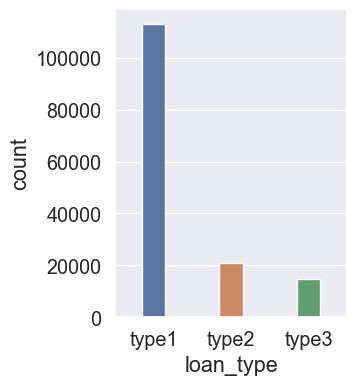

In [35]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.countplot(data=df , x='loan_type',width=0.3)

<Axes: xlabel='Status', ylabel='count'>

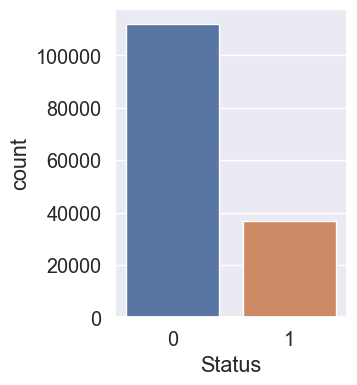

In [36]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.countplot(data=df , x='Status')

<Axes: xlabel='age', ylabel='count'>

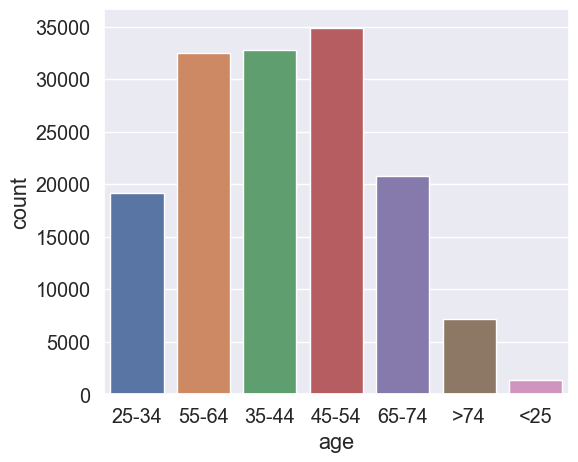

In [37]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data=df , x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

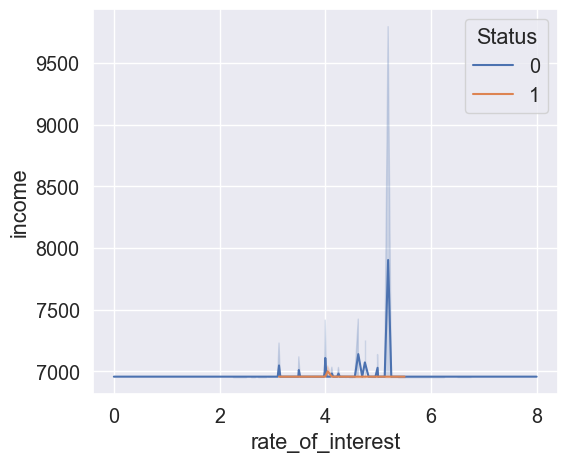

In [38]:
fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="Status")

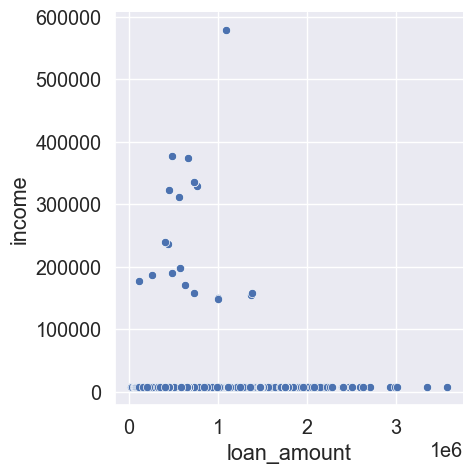

In [39]:
sns.relplot(x ="loan_amount", y ="income",data = df)

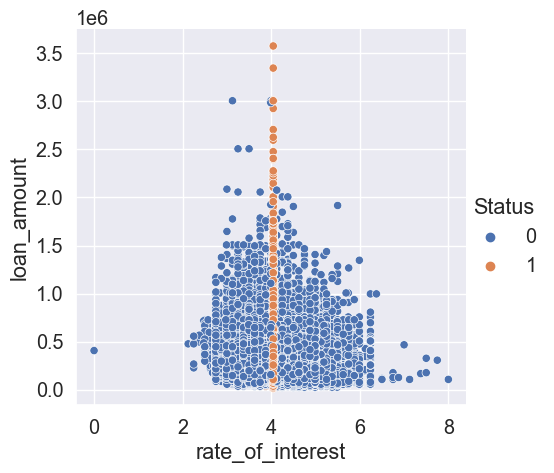

In [40]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='Status' ,data = df)

<Axes: xlabel='loan_amount', ylabel='Count'>

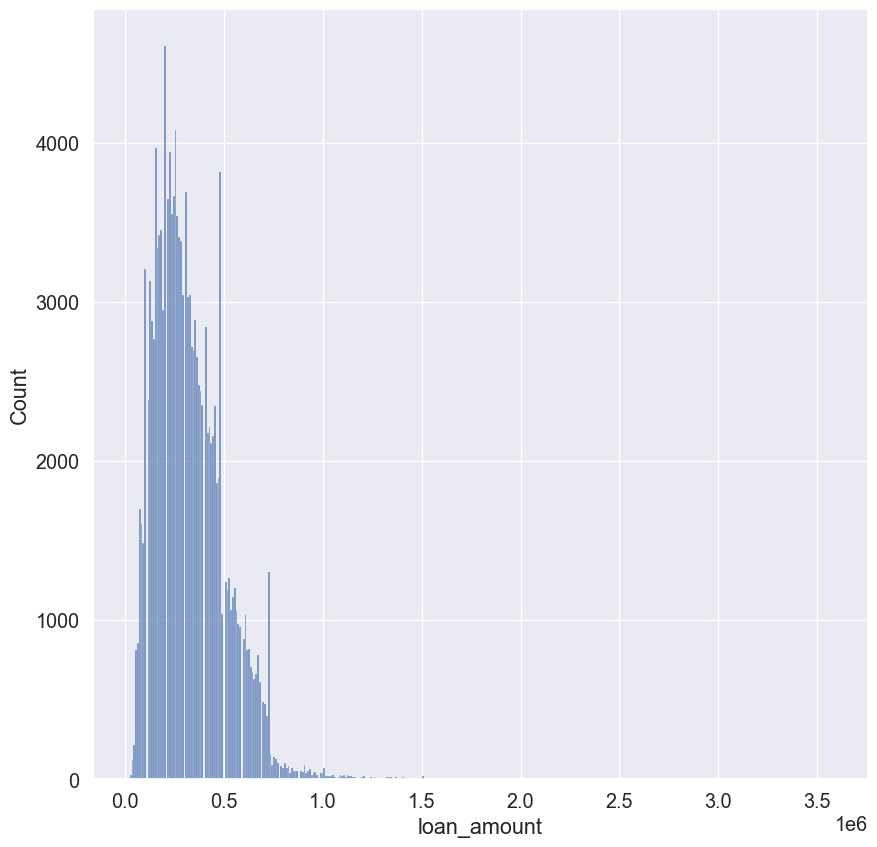

In [41]:
sns.histplot(df['loan_amount'])

<Axes: xlabel='Status', ylabel='loan_amount'>

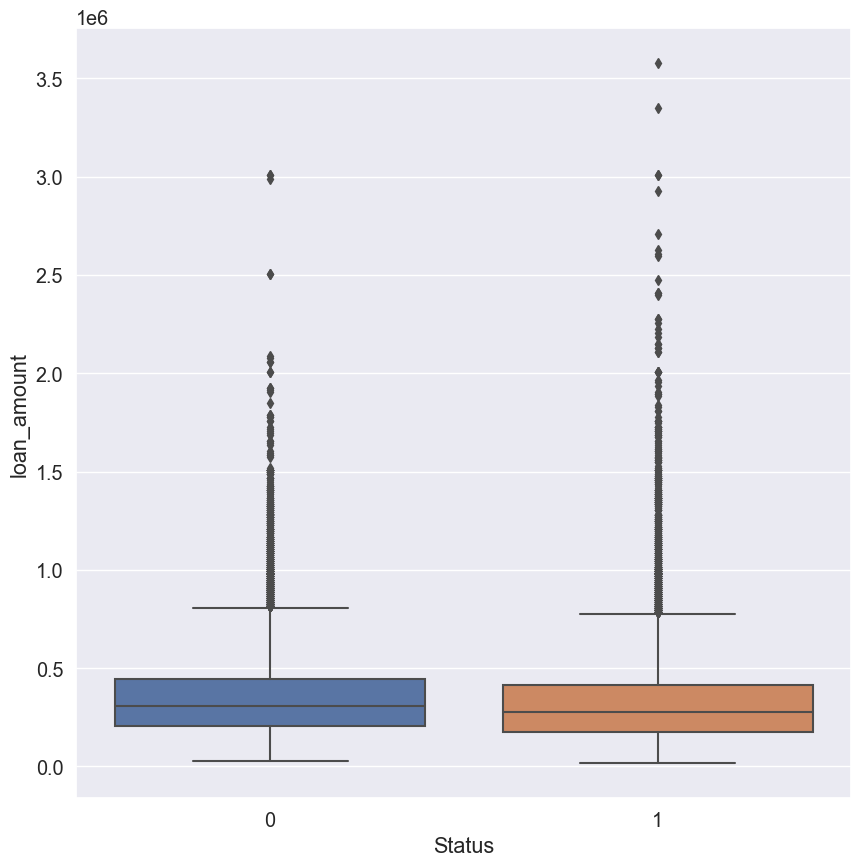

In [42]:
sns.boxplot(data=df , x='Status' , y ='loan_amount')

<Axes: xlabel='age', ylabel='Credit_Score'>

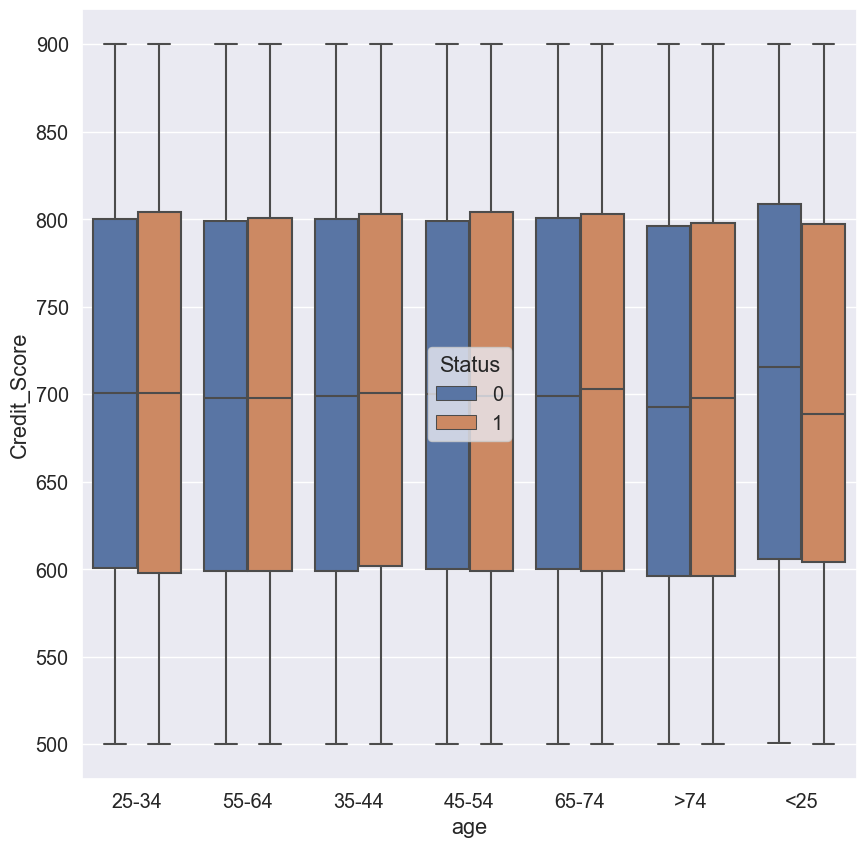

In [43]:
sns.boxplot(data=df , x='age' , y ='Credit_Score' , hue='Status')

/var/folders/tb/ppzwk3rj1x56zth2b1w72nsc0000gn/T/ipykernel_54853/2802813450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True)


<Axes: >

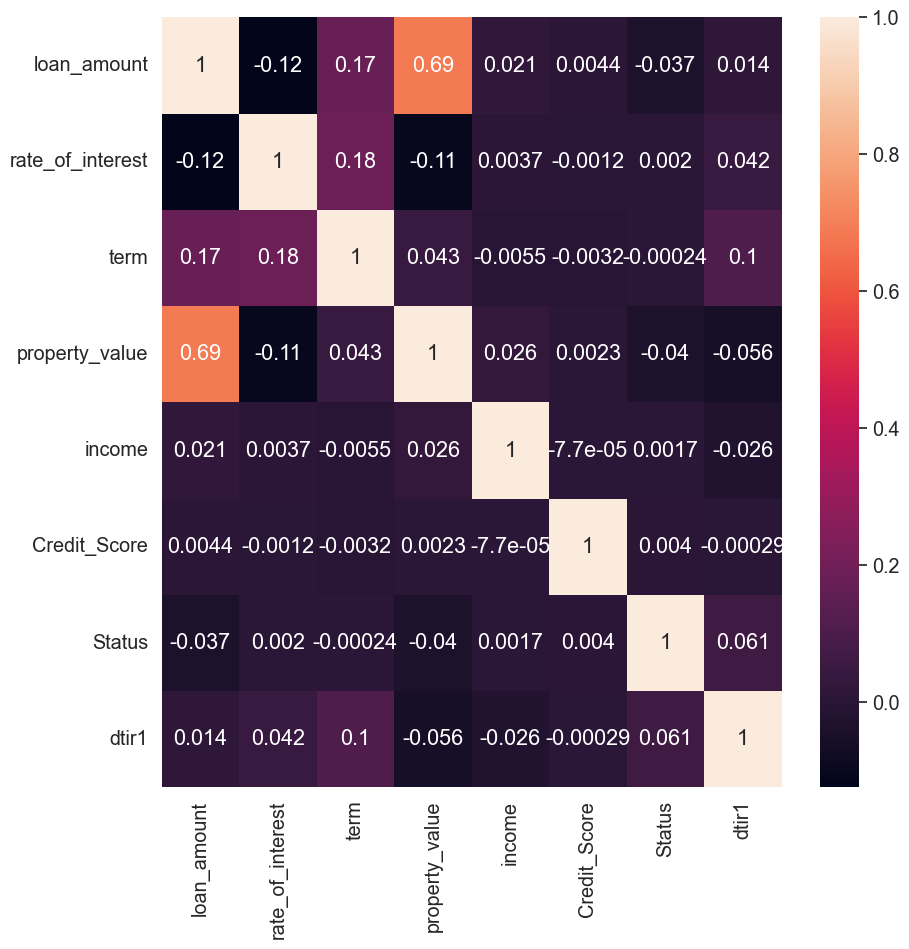

In [44]:
sns.heatmap(df.corr() , annot = True)

## Dealing with non-numerical values
### All data must be numerical to be used in the machine learning model

In [45]:
df = pd.get_dummies(df, columns=['loan_type','age'], drop_first=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   Credit_Score      148664 non-null  int64  
 6   Status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type2   148664 non-null  uint8  
 9   loan_type_type3   148664 non-null  uint8  
 10  age_35-44         148664 non-null  uint8  
 11  age_45-54         148664 non-null  uint8  
 12  age_55-64         148664 non-null  uint8  
 13  age_65-74         148664 non-null  uint8  
 14  age_<25           148664 non-null  uint8  
 15  age_>74           148664 non-null  uint8  
dtypes: float64(5), int64

In [47]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,Status,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,1,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,1,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,0,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,0,42.000000,0,0,0,1,0,0,0,0
4,696500,4.000000,360.0,758000.000000,6957.392164,602,0,39.000000,0,0,0,0,0,0,0,0


In [48]:
df.shape

(148664, 16)

In [49]:
df.to_csv('Model.csv')

# Splitting data to Train and Test Set

In [50]:
x = df.drop('Status', axis=1)
y = df['Status']

In [51]:
x

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,6957.392164,758,45.000000,0,0,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,6957.392164,552,37.732932,1,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,6957.392164,834,46.000000,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,6957.392164,587,42.000000,0,0,0,1,0,0,0,0
4,696500,4.000000,360.0,758000.000000,6957.392164,602,39.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,6957.392164,659,48.000000,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,6957.392164,569,15.000000,0,0,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6957.392164,702,49.000000,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,6957.392164,737,29.000000,0,0,0,0,1,0,0,0


In [52]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148664, dtype: int64

In [53]:
x.shape, y.shape

((148664, 15), (148664,))

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [55]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
94689,636500,4.045482,360.0,497900.200647,6957.392164,681,37.732932,0,0,1,0,0,0,0,0
15634,76500,4.375000,360.0,78000.000000,6957.392164,584,33.000000,0,0,0,0,0,1,0,0
67479,216500,4.250000,360.0,228000.000000,6957.392164,864,42.000000,1,0,0,0,1,0,0,0
9194,386500,4.875000,348.0,508000.000000,6957.392164,889,44.000000,0,0,0,1,0,0,0,0
2208,326500,3.875000,360.0,338000.000000,6957.392164,567,33.000000,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37743,136500,4.045482,360.0,497900.200647,6957.392164,757,37.732932,0,0,0,0,0,1,0,0
140952,216500,4.250000,240.0,988000.000000,6957.392164,616,9.000000,0,0,0,0,1,0,0,0
57159,316500,3.125000,360.0,378000.000000,6957.392164,854,37.732932,0,1,1,0,0,0,0,0
98133,206500,3.625000,360.0,288000.000000,6957.392164,824,44.000000,0,0,0,0,0,0,0,0


In [56]:
x_train.shape

(104064, 15)

In [57]:
x_test

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
39807,116500,3.990000,360.0,1.480000e+05,6957.392164,822,34.000000,0,0,0,0,0,0,0,0
127435,366500,3.125000,360.0,4.080000e+05,6957.392164,664,37.732932,1,0,0,1,0,0,0,0
91554,226500,3.990000,360.0,2.280000e+05,6957.392164,775,37.732932,1,0,0,1,0,0,0,0
8188,526500,4.045482,360.0,5.180000e+05,6957.392164,896,47.000000,0,0,0,0,1,0,0,0
43647,726500,4.875000,360.0,1.228000e+06,6957.392164,764,35.000000,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33629,356500,3.750000,360.0,9.080000e+05,6957.392164,641,45.000000,0,0,0,0,0,0,0,0
98186,196500,4.045482,360.0,4.979002e+05,6957.392164,870,37.732932,0,0,0,1,0,0,0,0
42904,536500,4.045482,360.0,7.080000e+05,6957.392164,525,37.732932,0,1,0,0,0,1,0,0
52068,346500,4.125000,360.0,3.680000e+05,6957.392164,600,46.000000,0,0,0,0,0,0,0,0


In [58]:
x_test.shape

(44600, 15)

In [59]:
y_train.shape

(104064,)

In [60]:
y_train.value_counts()

0    78417
1    25647
Name: Status, dtype: int64

In [61]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [62]:
y_train.value_counts()

1    78417
0    78417
Name: Status, dtype: int64

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[33547    63]
 [   21 10969]]
0.9981165919282511


In [64]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9981165919282511


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[33602     8]
 [   17 10973]]
0.999439461883408


In [66]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.999439461883408


# Conclusion 

* This model was created for predicting the eligibility for a loan (approved or not) according to many features.
* There were large number of features must be dropped , as:
* - Some of these features were meaningless such as (ID, Year, upfront charges, approved in advance…).
* - Some features had the same meaning and give the same information such as (loan purpose & loam type, Credit worthiness & credit score, Secured by & property value, LTV & dtir…)
* - Some features related to the post-process of approval such as (Nag amortization, submission of application…)
* From all of these features (Loan type, loan amount rate of interest, term, property value, income, credit score, age and dirt) were used to predict the eligibility for loan.
* We were asked to fill (Nan values) for some features and predict other values for some illogical values (income, interest rate).
* Number of unapproved loans were larger than approved.
* Loan amounts were between (3,576,500 and 16,500) with average interest rate (4.05).
* The largest category applied for alone there ages were between (45-54) for loan of (type 3).
* There is a lightly linear correlation between features and manly strong between (loan amount & property value& income). 
* After handling outliers and scaling, we were asked to convert all values to numerical values to be ready to be used for the model.
* Splitting data into train and test considering the scaling process to avoid any biased toward specific data.
* As our target was categorical, we cannot use Linear Regression model.
* The Decision tree model and Random forest model gave the best accuracy.
* Our first trial to drop features and depending on (18 feature) , we were suffering from overfitting ( train 98% & test 75% ) and can be handled by Cross validation and gave ( train 100% & test 100% ).
* After reducing the features to (10 features) and depending on the only affected features and it was a way of reducing overfitting, the accuracy was (train 93% & test 83%).
* By applying Cross validation, we got accuracy of 99% for average training score and 97% for average testing score.
* Alternativelly &Finally , using very simple model without scaling gave a very high accuracy without the needing for applying cross validation, as Decision Trees & Random foreast don't need it actually. Because, they just try to find a threshold value for a given feature that best splits the samples. And, whether you scale it or not, a similar threshold will be chosen, since the ordinality of the variables doesn't change(they do not require feature scaling to be performed as they are not sensitive to the the variance in the data.).
